# 4 分布图

## 4.6 分布式包点图

横坐标：城市里程<br>
纵坐标：汽车制造商<br>
图例：每种汽车制造商所产汽车的城市里程中位数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 4.6.1 导入数据并做简单数据处理

In [5]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [6]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [7]:
df_raw['cyl'].value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [8]:
#给气缸数不同的车添加不同的颜色
cyl_colors = {4:'tab:cyan', 5:'tab:green', 6:'tab:olive', 8:'tab:brown'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

In [9]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_color
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,tab:cyan
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,tab:cyan
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,tab:cyan
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,tab:cyan
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,tab:olive


In [10]:
df_raw[['cty', 'manufacturer']]

,cty,manufacturer
0,18,audi
1,21,audi
2,20,audi
3,21,audi
4,16,audi
...,...,...
229,19,volkswagen
230,21,volkswagen
231,16,volkswagen
232,18,volkswagen


In [11]:
df_raw[['cty', 'manufacturer']].groupby('manufacturer')

In [12]:
df_raw[['cty', 'manufacturer']].groupby('manufacturer').mean()

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [13]:
df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [14]:
#计算每一个汽车制造商的城市里程平均数
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
df.sort_values('cty', ascending = False, inplace = True) #根据城市里程从大到小排序
df.reset_index(inplace = True) #重置排序后的索引

In [15]:
df

,manufacturer,cty
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


In [16]:
#计算每一个汽车制造商的城市里程中位数
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

In [17]:
df_median

,cty
manufacturer,
audi,17.5
chevrolet,15.0
dodge,13.0
ford,14.0
honda,24.0
hyundai,18.5
jeep,14.0
land rover,11.5
lincoln,11.0


### 4.6.2 绘制目标图形

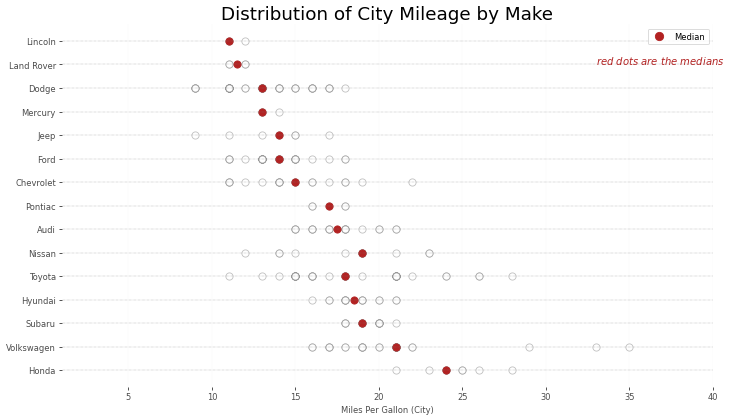

In [18]:
#创建画布
fig, ax = plt.subplots(figsize = (14,8), dpi = 60) #画布和子图分开

#根据每个制造商所产汽车的城市里程均值大小，绘制水平线图
ax.hlines(y = df.index
         ,xmin = 0
         ,xmax = 40 #根据数据集设定
         ,color = 'gray'
         ,alpha = 0.5
         ,linewidth = 0.5
         ,linestyles = 'dashdot'
         )

#绘制每个制造商所产汽车的城市里程散点图
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer == make, :] #提取出每个制造商的相关数据
    ax.scatter(y = np.repeat(i, df_make.shape[0]) #纵坐标
              ,x = df_make['cty']
              ,s = 75
              ,edgecolors = 'gray'
              ,c = 'w'
              ,alpha = 0.5
              ) #在一行中绘制出所有的城市里程数据点
    ax.scatter(y = i
              ,x = 'cty'
              ,data = df_median.loc[df_median.index == make, :]
              ,s = 75
              ,c = 'firebrick'
              ) #绘制出每个制造商所产汽车的城市里程中位数
    
#添加文本说明
ax.text(33
       ,13
       ,"$red\ dots\ are\ the\ medians$" #不转义会挨在一起，写空格也没用
       ,fontdict = {'size':12}
       ,color = 'firebrick'
       )

#去掉图形边框
plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

#添加装饰
ax.set_title('Distribution of City Mileage by Make', fontdict = {'size':22}) #添加标题
ax.set_xlabel('Miles Per Gallon (City)', alpha = 0.7) #设定x轴标题
plt.xticks(alpha = 0.7) #设定x轴刻度(两种方法)
ax.set_yticks(df.index) #设定y轴刻度(两种方法)
ax.set_yticklabels(df.manufacturer.str.title() #标题形式：每个单词的首字母大写
                  ,fontdict={'horizontalalignment': 'right'}
                  ,alpha=0.7
                  ) #设定y轴标题
ax.set_xlim(1, 40) #设定x轴刻度范围

#添加图例
red_patch = plt.plot([]
                    ,[]
                    ,marker = 'o' #圆形
                    ,ms = 10 #大小
                    ,ls = '' #线的类型
                    ,mec = None
                    ,color = 'firebrick' #砖红色
                    , label = 'Median' #图例内容
                    ) #添加补丁（图例）
ax.legend(handles = red_patch) #添加图例
plt.grid(axis = 'both', alpha = 0.4, linewidth = 0.1) #配置网格线
plt.show()

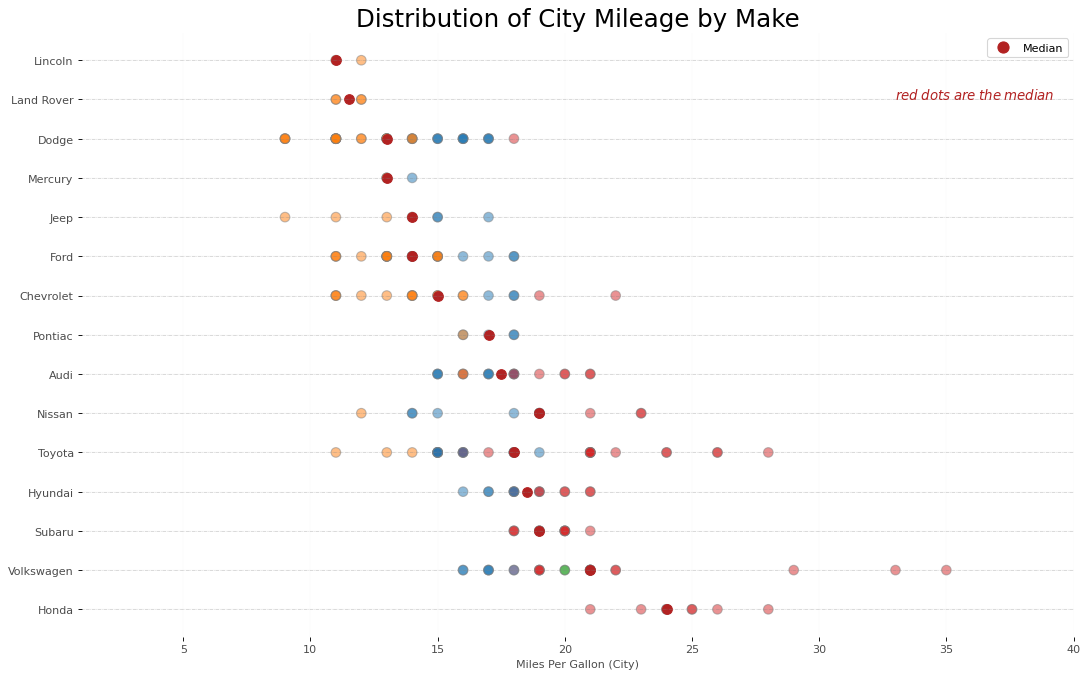

In [19]:
#源代码
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x=df_make['cty'], s=75, edgecolors='gray', c=df_make['cyl_color'], alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')
    
# Annotate
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
patch1 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:cyan', label="cyl = 4")
patch2 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:green', label="cyl = 5")
patch3 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:olive', label="cyl = 6")
patch4 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:brown', label="cyl = 8")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

### 4.6.3 图像解读

不同汽车：纵坐标（从下到上）的均值由大到小排列，中位数趋势与均值基本相同；同一种汽车：林肯大部分城市里程在中位数附近，volkswagen中位数偏大，honda只生产气缸数是4的汽车。